In [1]:
import numpy as np
import h5py
import netCDF4 as nc
import oceanDAS as odas
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import date, datetime, timezone
from scipy import signal

%matplotlib inline
%cd -q '/Users/hglover/Library/CloudStorage/Box-Box/FiberExperiments/DAScomparison_paper/'

In [11]:
# Duck
pname = 'DuckNC_Glover/'

# load performance based on only using 11m awac
with np.load(pname+'empCalNov_allto11mawac.npz') as data:
    rmse_te_duc = data['rmse_te']
    rmse_tp_duc = data['rmse_tp']
    rmse_hs_duc = data['rmse_hs']
# load performance based on only using 11m awac but with shoaling
with np.load(pname+'empCalNov_allto11mawac_shoal.npz') as data:
    rmse_te_ducShoal = data['rmse_te']
    rmse_tp_ducShoal = data['rmse_tp']
    rmse_hs_ducShoal = data['rmse_hs']

# distance
xyz = np.genfromtxt(pname+'channelXYZ.csv', delimiter=',')
xyz[xyz==0] = 999
idx = np.argmin(np.abs(np.abs(xyz[:,2])-11)) # find 11m channel
dist_duc = np.abs(xyz[:,0]-xyz[idx,0])
dist_duc = dist_duc[:546]

rmse_te_ducShoal[dist_duc<40] = np.nan
rmse_tp_ducShoal[dist_duc<40] = np.nan
rmse_hs_ducShoal[dist_duc<40] = np.nan


In [3]:
# KNO
pname = 'KNO_Glover/'

# load performance based on only using 11m awac
with np.load(pname+'waveCalcs_F1_p8_allCh.npz') as data:
    rmse_te_kno = data['rmse_te']
    rmse_tp_kno = data['rmse_tp']
    rmse_hs_kno = data['rmse_hs']
# distance
dx = len(rmse_te_kno)
dist_kno = np.arange(dx*1.6,0,-1.6)


In [4]:
# oliktok
pname = 'OliktokPoint_Smith/'
# load performance based on only using 11m awac
with np.load(pname+'waveStatsOliktok_allCh.npz') as data:
    rmse_te_oli = data['rmse_te']
    rmse_tp_oli = data['rmse_tp']
    rmse_hs_oli = data['rmse_hs']

ff = np.genfromtxt(pname+'CODAS_info.csv', delimiter=',',skip_header=1)
dist_oli = np.abs(ff[:,4]-ff[394,4])*1000
# 7960 is closest to SWIFT, its line 394...lazy

In [5]:
# Homer

pname = 'HomerAK_Williams/'
with np.load(pname + 'waveStatsHomer_allCh.npz') as data:
    rmse_te_hom = data['rmse_te']
    rmse_tp_hom = data['rmse_tp']
    rmse_hs_hom = data['rmse_hs']
    dist_hom = data['dist']


Text(12, 1.6, 'B)')

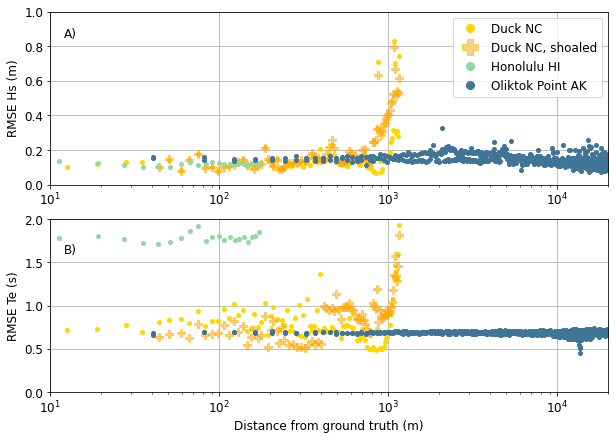

In [12]:
plt.rc('font', size=12)
plt.rcParams['lines.markersize'] = 8
plt.rcParams['lines.linestyle'] = 'none'
plt.rcParams['lines.marker'] = '.'
_, _, clrs = odas.all_line_info()
clrs[0,2]=0.5
fig,ax = plt.subplots(2,1,figsize=(10,7))
ax = ax.ravel()

# hs
ax[0].plot(dist_duc,rmse_hs_duc,c='gold',label='Duck NC')
ax[0].plot(dist_duc,rmse_hs_ducShoal,c='orange', alpha=0.5, marker= 'P', label='Duck NC, shoaled')
ax[0].plot(dist_kno,rmse_hs_kno,c=clrs[1,:],label='Honolulu HI')
ax[0].plot(dist_oli,rmse_hs_oli,c=clrs[3,:],label='Oliktok Point AK')
# ax[0].plot(dist_hom,rmse_hs_hom,c=clrs[4,:],label='Homer AK')
ax[0].set_xscale('log')
ax[0].set_xlim([10,20000])
ax[0].set_ylim([0,1])
ax[0].set_ylabel('RMSE Hs (m)')
ax[0].legend(markerscale=2)
ax[0].grid(which='major', axis='both')

# te
ax[1].plot(dist_duc,rmse_te_duc,c='gold')
ax[1].plot(dist_duc,rmse_te_ducShoal,c='orange', alpha=0.5, marker= 'P')
ax[1].plot(dist_kno,rmse_te_kno,c=clrs[1,:])
ax[1].plot(dist_oli,rmse_te_oli,c=clrs[3,:])
# ax[1].plot(dist_hom,rmse_te_hom,c=clrs[4,:])
ax[1].set_xscale('log')
ax[1].set_xlim([10,20000])
ax[1].set_ylim([0,2])
ax[1].set_ylabel('RMSE Te (s)')
ax[1].set_xlabel('Distance from ground truth (m)')
ax[1].grid(which='major', axis='both')

ax[0].text(12,0.85, 'A)')
ax[1].text(12,1.6, 'B)')


# fig.savefig('/Users/hglover/Library/CloudStorage/Box-Box/HannahGlover/writing/das_comparison/figs/F10_CompareStatsByDistance.png')